In [11]:
#Load iris dataset
from sklearn.datasets import load_iris
df=load_iris(as_frame=True).frame
print (df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [12]:
#Separate data and target into X and y
X=df.iloc[:,:-1] #All rows, every column except last
y=df.iloc[:,-1] #All rows, last column only
print (X.head())
print (y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [13]:
#Split dataset into Test and Train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [14]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
#Accuracy testing
from sklearn.metrics import precision_score,recall_score
y_pred=model.predict(X_test)
print (f'Precision: {precision_score(y_test,y_pred,average="macro")}')
print (f'Recall: {recall_score(y_test,y_pred,average="macro")}')

Precision: 1.0
Recall: 1.0


[Text(0.5, 0.9166666666666666, 'x[2] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, '

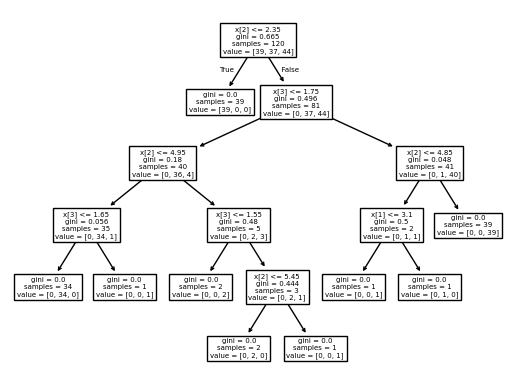

In [16]:
#Visualization of the decision tree
plot_tree(model)

In [17]:
#Parameters tuning
from sklearn.model_selection import GridSearchCV
parameters_grid={
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 3, 5, 8, 12, 16, 24],
    "min_samples_split": [2, 5, 10, 20, 50],
    "min_samples_leaf": [1, 2, 5, 10, 20],
    "max_features": [None, "sqrt", "log2"],
    "class_weight": [None, "balanced"],
}

grid=GridSearchCV(DecisionTreeClassifier(),parameters_grid,cv=3)
grid.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'class_weight': [None, 'balanced'], 'criterion': ['gini', 'entropy', ...], 'max_depth': [None, 3, ...], 'max_features': [None, 'sqrt', ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [18]:
print (grid.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [19]:
#Accuracy testing
tuned_model = grid.best_estimator_
y_pred=tuned_model.predict(X_test)
print (f'Precision: {precision_score(y_test,y_pred,average="macro")}')
print (f'Recall: {recall_score(y_test,y_pred,average="macro")}')

Precision: 0.9555555555555556
Recall: 0.8888888888888888


In [20]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)
print (f'Accuracy: {model.score(X_test,y_test):.2f}')

Accuracy: 1.00
